<a href="https://colab.research.google.com/github/MonikaLamba/Customer-Segmentation/blob/main/KMeans%7C_Cust_Segmentation_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
import warnings
warnings.filterwarnings('ignore')


Read Data

In [4]:
df=pd.read_csv("/content/Mall_Customers.csv")

See first 5 rows of the Dataset

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Last five rows of the dataset

In [6]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Size of the Dataset

In [7]:
df.shape

(200, 5)

Picking only columns Annual Income and Spending Score from the dataset

In [8]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [9]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(x_scaled)
    wcss.append(Kmeans.inertia_)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

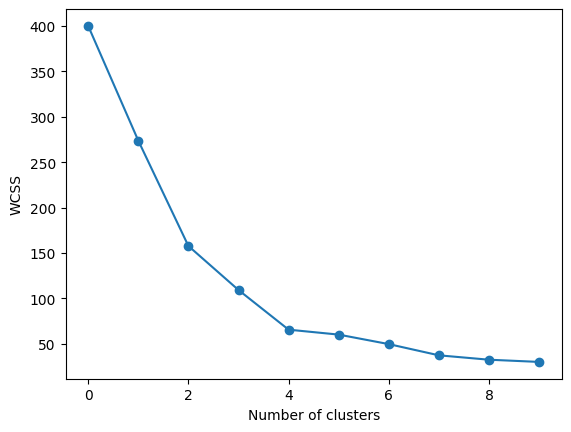

In [15]:
plt.plot(range(len(wcss)),wcss,marker='o')
plt.title=("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)

In [17]:
y_kmeans=kmeans.fit_predict(x_scaled)

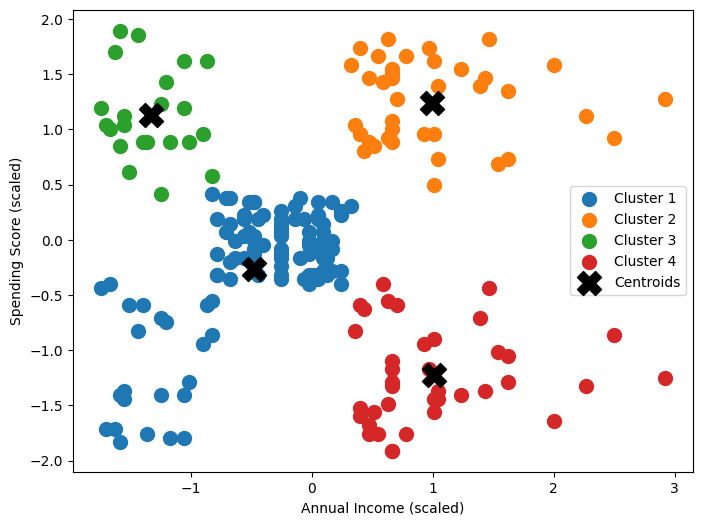

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=100, label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=100, label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=100, label='Cluster 3')
plt.scatter(x_scaled[y_kmeans == 3, 0], x_scaled[y_kmeans == 3, 1], s=100, label='Cluster 4')
#plt.scatter(x_scaled[y_kmeans == 4, 0], x_scaled[y_kmeans == 4, 1], s=100, label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', label='Centroids', marker='X')


plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()


In [19]:
df['Label'] = y_kmeans
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [20]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3
199,200,Male,30,137,83,1


In [21]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [22]:
df.shape

(200, 6)

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

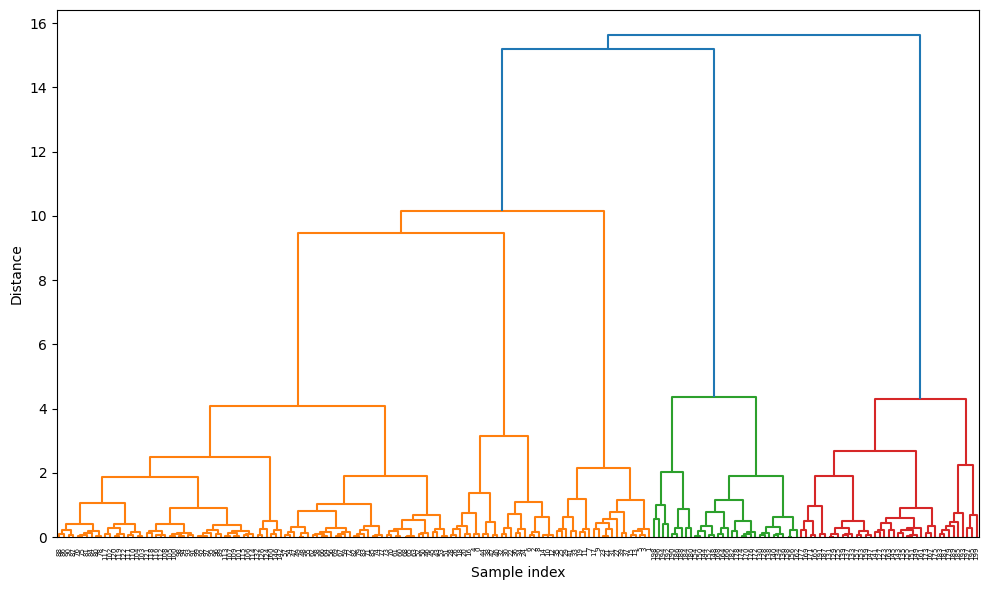

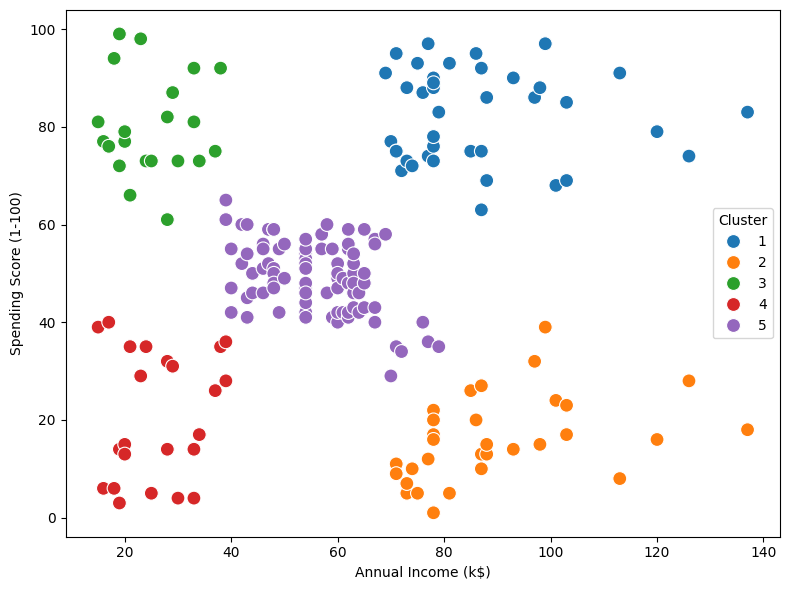

In [39]:
A = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize the features
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

# Perform hierarchical clustering
linked = linkage(A_scaled, method='ward') #ward, single, complete

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
#plt.subplots("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Choose number of clusters (e.g., 5) and assign cluster labels
n_clusters = 5
df["Cluster"] = fcluster(linked, n_clusters, criterion='maxclust')

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="tab10", s=100)
#plt.subplots("Customer Segments (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

